<a href="https://colab.research.google.com/github/alishabohara03/Data-Warehousing-and-Data-Mining/blob/main/Lab4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>


#Use “data.csv” for 1-5.



In [1]:
from google.colab import drive
import pandas as pd
import numpy as np


# Loading dataset
data = pd.read_csv('/content/drive/MyDrive/DWDM/data.csv')  # adjust path if needed
X = data.values  # convert to NumPy for algorithm compatibility


#1.Write a program to implement the k-means algorithm.


Qno1 - K-Means Centroids:
  Centroid 1: (1.825, 2.292)
  Centroid 2: (5.883, 5.745)
  Centroid 3: (7.000, 1.000)


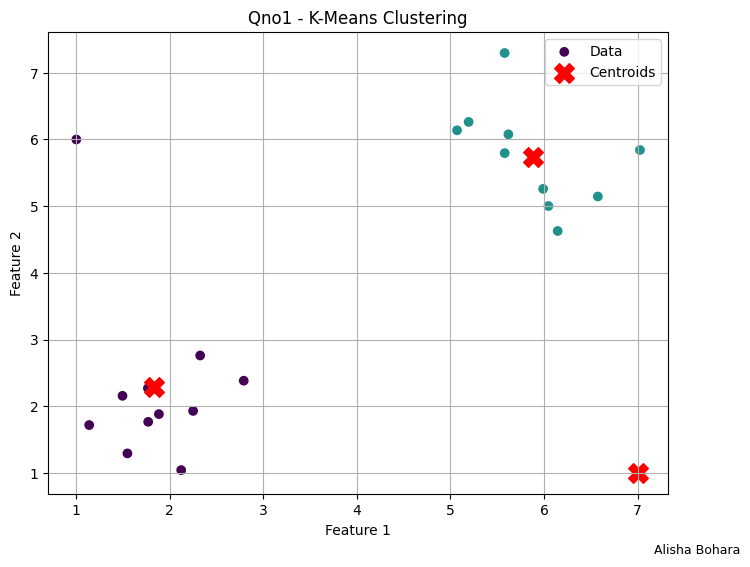

In [20]:
from sklearn.metrics import pairwise_distances_argmin
import matplotlib.pyplot as plt

def k_means(X, k, max_iters=100):
    centroids = X[np.random.choice(len(X), k, replace=False)]
    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Run K-Means
centroids, labels = k_means(X, k=3)


print("Qno1 - K-Means Centroids:")
for i, c in enumerate(centroids, 1):
    print(f"  Centroid {i}: ({c[0]:.3f}, {c[1]:.3f})")


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis', label="Data")
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("Qno1 - K-Means Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.figtext(0.99, 0.01, " Alisha Bohara", ha="right", fontsize=9, color='Black')
plt.grid(True)
plt.show()


#2.Write a program to implement the k-means ++ algorithm

Qno2 - K-Means++ Centroids:
  Centroid 1: (5.883, 5.745)
  Centroid 2: (2.371, 1.837)
  Centroid 3: (1.000, 6.000)


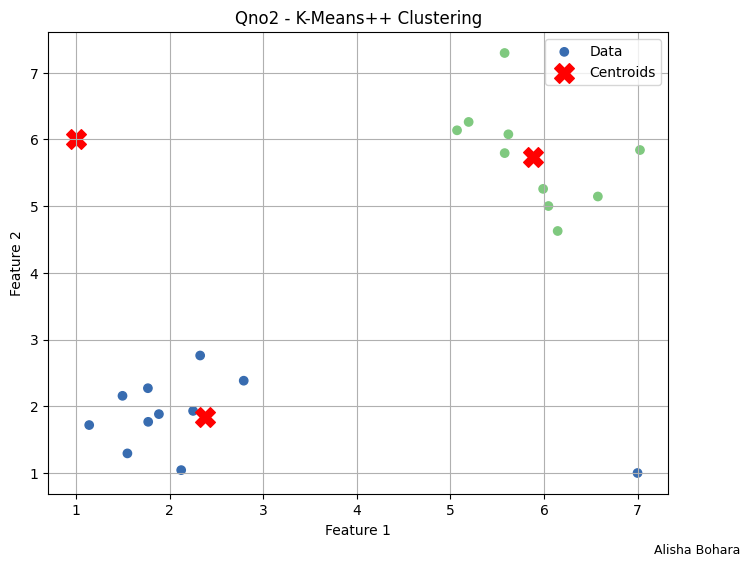

In [19]:
def initialize_kmeans_plus_plus(X, k):
    centroids = [X[np.random.randint(len(X))]]
    for _ in range(1, k):
        distances = np.array([min([np.inner(x - c, x - c) for c in centroids]) for x in X])
        probabilities = distances / distances.sum()
        cumulative_probs = np.cumsum(probabilities)
        r = np.random.rand()
        for i, p in enumerate(cumulative_probs):
            if r < p:98u7yhhb
                centroids.append(X[i])
                break
    return np.array(centroids)

def kmeans_plus_plus(X, k, max_iters=100):
    centroids = initialize_kmeans_plus_plus(X, k)
    for _ in range(max_iters):
        labels = pairwise_distances_argmin(X, centroids)
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        if np.allclose(centroids, new_centroids):
            break
        centroids = new_centroids
    return centroids, labels

# Run K-Means++
centroids_pp, labels_pp = kmeans_plus_plus(X, k=3)


print("Qno2 - K-Means++ Centroids:")
for i, c in enumerate(centroids_pp, 1):
    print(f"  Centroid {i}: ({c[0]:.3f}, {c[1]:.3f})")


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_pp, cmap='Accent', label="Data")
plt.scatter(centroids_pp[:, 0], centroids_pp[:, 1], c='red', marker='X', s=200, label="Centroids")
plt.title("Qno2 - K-Means++ Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.figtext(0.99, 0.01, " Alisha Bohara", ha="right", fontsize=9, color='Black')
plt.grid(True)
plt.show()


#3.Write a program to implement k-medoids algorithm.


Qno3 - K-Medoids Medoids:
  Medoid 1: (6.047, 5.003)
  Medoid 2: (5.194, 6.263)
  Medoid 3: (1.883, 1.883)


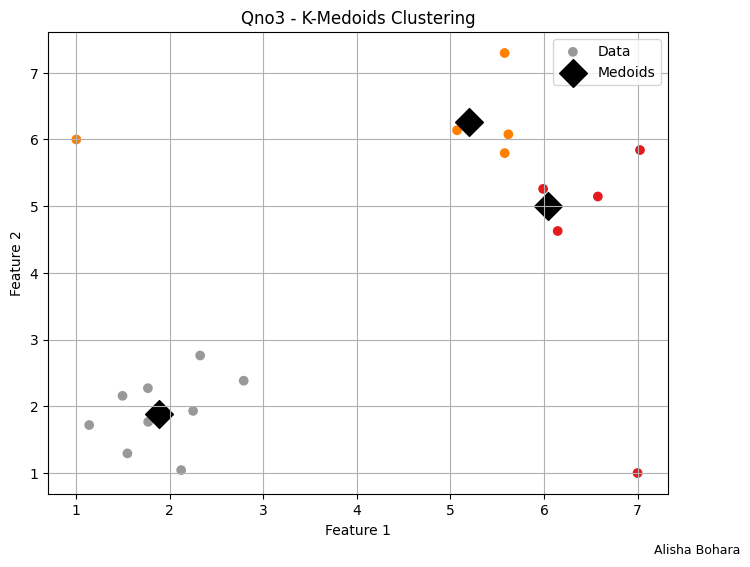

In [18]:
from sklearn.metrics import pairwise_distances

def k_medoids(X, k, max_iters=100):
    m = len(X)
    medoid_indices = np.random.choice(m, k, replace=False)
    medoids = X[medoid_indices]

    for _ in range(max_iters):
        distances = pairwise_distances(X, medoids)
        labels = np.argmin(distances, axis=1)

        new_medoids = []
        for i in range(k):
            cluster_points = X[labels == i]
            if len(cluster_points) == 0:
                continue
            dist_matrix = pairwise_distances(cluster_points, cluster_points)
            medoid_index = np.argmin(dist_matrix.sum(axis=1))
            new_medoids.append(cluster_points[medoid_index])

        new_medoids = np.array(new_medoids)

        if np.allclose(medoids, new_medoids):
            break
        medoids = new_medoids

    return medoids, labels

# Run K-Medoids
medoids, labels_kmedoids = k_medoids(X, k=3)

print("Qno3 - K-Medoids Medoids:")
for i, c in enumerate(medoids, 1):
    print(f"  Medoid {i}: ({c[0]:.3f}, {c[1]:.3f})")


# Plot
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_kmedoids, cmap='Set1', label="Data")
plt.scatter(medoids[:, 0], medoids[:, 1], c='black', marker='D', s=200, label="Medoids")
plt.title("Qno3 - K-Medoids Clustering")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.figtext(0.99, 0.01, " Alisha Bohara", ha="right", fontsize=9, color='Black')
plt.grid(True)
plt.show()


#4.Write a program to implement an agglomerative hierarchical clustering algorithm.


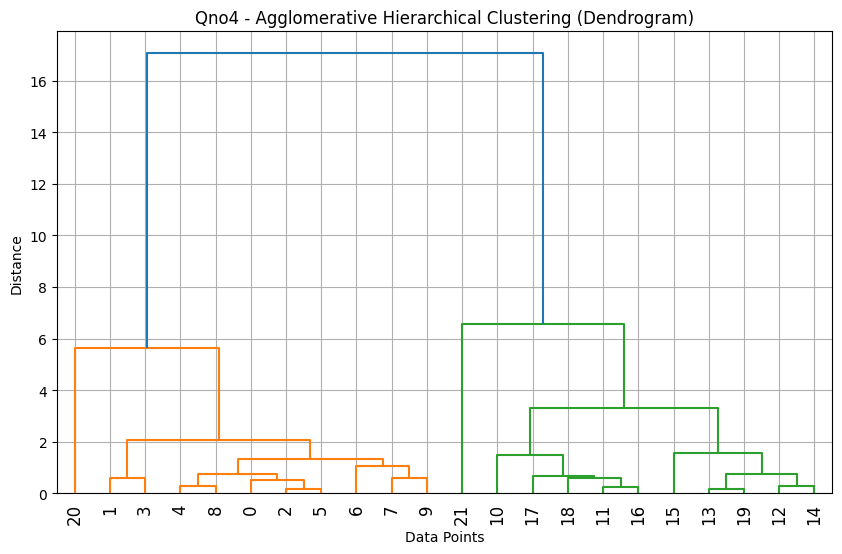

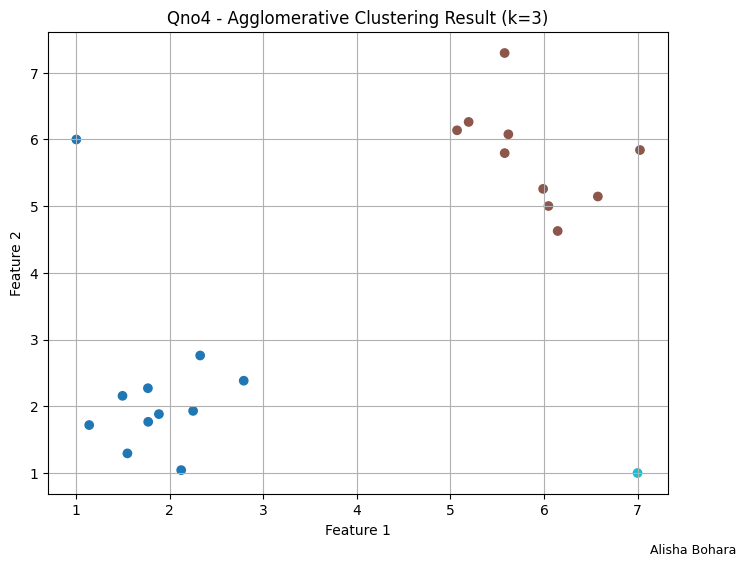

Qno4 - Agglomerative Clustering Labels:
[1 1 1 1 1 1 1 1 1 1 2 2 2 2 2 2 2 2 2 2 1 3]


In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from scipy.cluster.hierarchy import dendrogram, linkage, fcluster

# Perform Agglomerative Clustering using Ward’s method
Z = linkage(X, method='ward')

# Plot dendrogram
plt.figure(figsize=(10, 6))
dendrogram(Z, truncate_mode='lastp', p=30, leaf_rotation=90., leaf_font_size=12., show_contracted=True)
plt.title("Qno4 - Agglomerative Hierarchical Clustering (Dendrogram)")
plt.xlabel("Data Points")
plt.ylabel("Distance")

plt.grid(True)
plt.show()

# Assign cluster labels (k=3)
labels_agg = fcluster(Z, t=3, criterion='maxclust')

# Plot result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_agg, cmap='tab10')
plt.title("Qno4 - Agglomerative Clustering Result (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.figtext(0.99, 0.01, "Alisha Bohara ", ha="right", fontsize=9, color='Black')
plt.grid(True)
plt.show()

# Print labels
print("Qno4 - Agglomerative Clustering Labels:")
print(labels_agg)


#5.Write a program to implement a divisive algorithm.

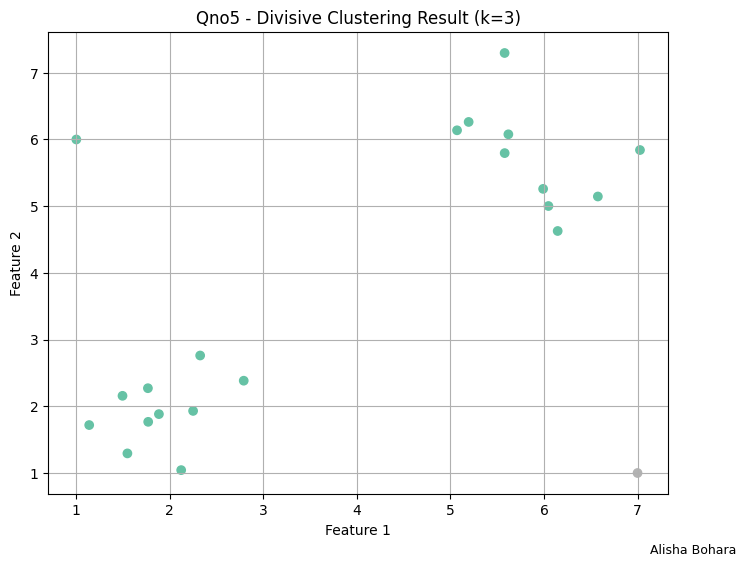

Qno5 - Divisive Clustering Labels:
[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 2]


In [16]:
from sklearn.cluster import KMeans

def divisive_clustering(X, k):
    clusters = [X]  # start with all data in one cluster
    labels = np.zeros(len(X), dtype=int)

    current_label = 0

    while len(clusters) < k:
        # Find the cluster with the largest number of points
        cluster_sizes = [len(c) for c in clusters]
        idx_to_split = np.argmax(cluster_sizes)
        cluster_to_split = clusters.pop(idx_to_split)

        # Apply KMeans with k=2 to split it
        kmeans = KMeans(n_clusters=2, random_state=0)
        split_labels = kmeans.fit_predict(cluster_to_split)

        # Create two new clusters
        cluster1 = cluster_to_split[split_labels == 0]
        cluster2 = cluster_to_split[split_labels == 1]

        clusters.append(cluster1)
        clusters.append(cluster2)

        # Update labels
        original_indices = np.where(labels == idx_to_split)[0]
        labels[original_indices[split_labels == 0]] = len(clusters) - 2
        labels[original_indices[split_labels == 1]] = len(clusters) - 1

    return labels

# Apply divisive clustering
labels_div = divisive_clustering(X, k=3)

# Plot result
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels_div, cmap='Set2')
plt.title("Qno5 - Divisive Clustering Result (k=3)")
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.figtext(0.99, 0.01, " Alisha Bohara ", ha="right", fontsize=9, color='Black')
plt.grid(True)
plt.show()

# Print result
print("Qno5 - Divisive Clustering Labels:")
print(labels_div)


#6.Write a program to implement the DBSCAN algorithm.

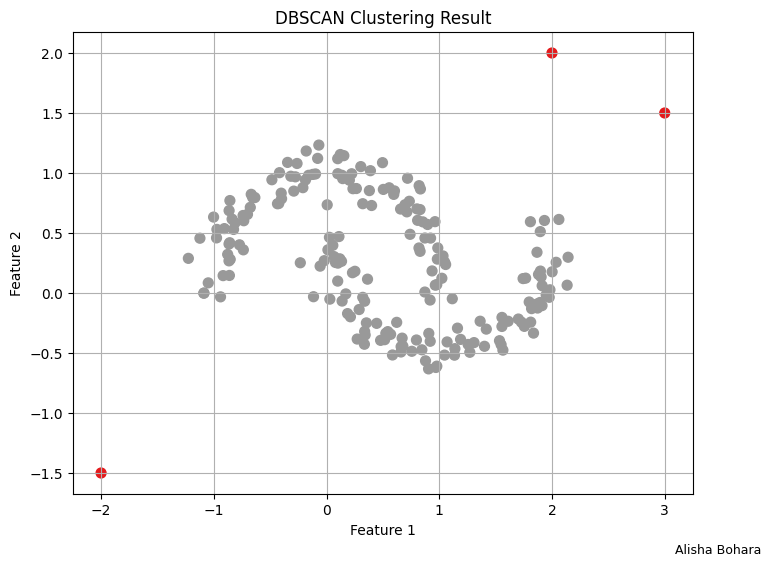

DBSCAN cluster labels:
[ 0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0
  0  0  0  0  0  0  0  0 -1 -1 -1]


In [22]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset
data = pd.read_csv('/content/drive/MyDrive/DWDM/data2.csv')
X = data.values

# Euclidean distance function
def euclidean_distance(p1, p2):
    return np.sqrt(np.sum((p1 - p2) ** 2))

# DBSCAN implementation
def dbscan(X, eps, min_pts):
    n = len(X)
    labels = np.full(n, -1)  # Initialize all labels as -1 (noise)
    cluster_id = 0

    visited = np.zeros(n, dtype=bool)

    def region_query(point_idx):
        neighbors = []
        for i in range(n):
            if euclidean_distance(X[point_idx], X[i]) <= eps:
                neighbors.append(i)
        return neighbors

    def expand_cluster(point_idx, neighbors, cluster_id):
        labels[point_idx] = cluster_id
        i = 0
        while i < len(neighbors):
            neighbor_idx = neighbors[i]
            if not visited[neighbor_idx]:
                visited[neighbor_idx] = True
                neighbor_neighbors = region_query(neighbor_idx)
                if len(neighbor_neighbors) >= min_pts:
                    neighbors += [n_idx for n_idx in neighbor_neighbors if n_idx not in neighbors]
            if labels[neighbor_idx] == -1:
                labels[neighbor_idx] = cluster_id
            i += 1

    for point_idx in range(n):
        if not visited[point_idx]:
            visited[point_idx] = True
            neighbors = region_query(point_idx)
            if len(neighbors) < min_pts:
                labels[point_idx] = -1  # Noise
            else:
                expand_cluster(point_idx, neighbors, cluster_id)
                cluster_id += 1

    return labels

# Parameters for DBSCAN
eps = 0.5      # Radius for neighborhood
min_pts = 5    # Minimum points to form dense region

# Run DBSCAN
labels = dbscan(X, eps, min_pts)

# Plotting
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.title('DBSCAN Clustering Result')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.figtext(0.99, 0.01, " Alisha Bohara ", ha="right", fontsize=9, color='Black')
plt.grid(True)
plt.show()

# Print cluster labels
print("DBSCAN cluster labels:")
print(labels)


#7.Write a program to perform outlier analysis using the Z-score method.

Mean: 0.659
Standard Deviation: 7.189

Z-scores for each data point:
Index  0: Value =   1.000, Z-score =   0.047
Index  1: Value =   2.000, Z-score =   0.186
Index  2: Value =   3.000, Z-score =   0.326
Index  3: Value =   4.000, Z-score =   0.465
Index  4: Value =  10.000, Z-score =   1.299
Index  5: Value =   4.500, Z-score =   0.534
Index  6: Value = -10.000, Z-score =  -1.483
Index  7: Value =   2.500, Z-score =   0.256
Index  8: Value =  -1.500, Z-score =  -0.300
Index  9: Value =  -1.010, Z-score =  -0.232
Index 10: Value =  -0.500, Z-score =  -0.161
Index 11: Value =   0.500, Z-score =  -0.022
Index 12: Value =   6.500, Z-score =   0.812
Index 13: Value =   8.900, Z-score =   1.146
Index 14: Value = -20.000, Z-score =  -2.874

No outliers detected based on the Z-score threshold.


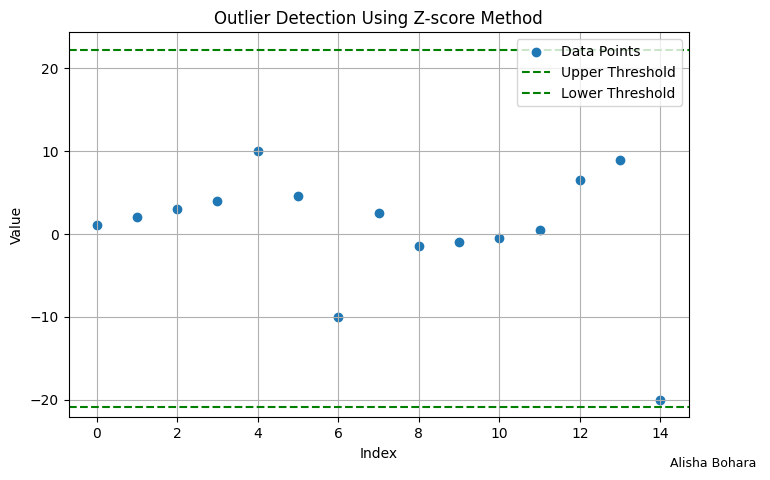

In [24]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/DWDM/data3.csv')  # adjust path if needed
X = data['Value'].values  # Extract the 'Value' column as a NumPy array

# Calculate mean and standard deviation
mean = np.mean(X)
std = np.std(X)

# Calculate Z-scores
z_scores = (X - mean) / std

# Define threshold for outlier detection
threshold = 3  # Commonly used threshold

# Detect outliers
outliers = np.where(np.abs(z_scores) > threshold)[0]

# Nicely formatted output
print(f"Mean: {mean:.3f}")
print(f"Standard Deviation: {std:.3f}")

print("\nZ-scores for each data point:")
for i, z in enumerate(z_scores):
    print(f"Index {i:2d}: Value = {X[i]:7.3f}, Z-score = {z:7.3f}")

if len(outliers) == 0:
    print("\nNo outliers detected based on the Z-score threshold.")
else:
    print(f"\nOutliers detected at indices: {list(outliers)}")
    print("Outlier values:", X[outliers])

# Plot data points and highlight outliers
plt.figure(figsize=(8, 5))
plt.scatter(range(len(X)), X, label='Data Points')
if len(outliers) > 0:
    plt.scatter(outliers, X[outliers], color='red', label='Outliers', s=100)
plt.axhline(mean + threshold*std, color='green', linestyle='--', label='Upper Threshold')
plt.axhline(mean - threshold*std, color='green', linestyle='--', label='Lower Threshold')
plt.title('Outlier Detection Using Z-score Method')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.figtext(0.99, 0.01, " Alisha Bohara ", ha="right", fontsize=9, color='Black')
plt.show()


#8.Write a program to perform outlier detection using IQR method.

Q1 (25th percentile): -0.755
Q3 (75th percentile): 4.250
IQR (Q3 - Q1): 5.005
Lower Bound: -8.263
Upper Bound: 11.758

Outliers detected at indices: [np.int64(6), np.int64(14)]
Outlier values: [-10. -20.]


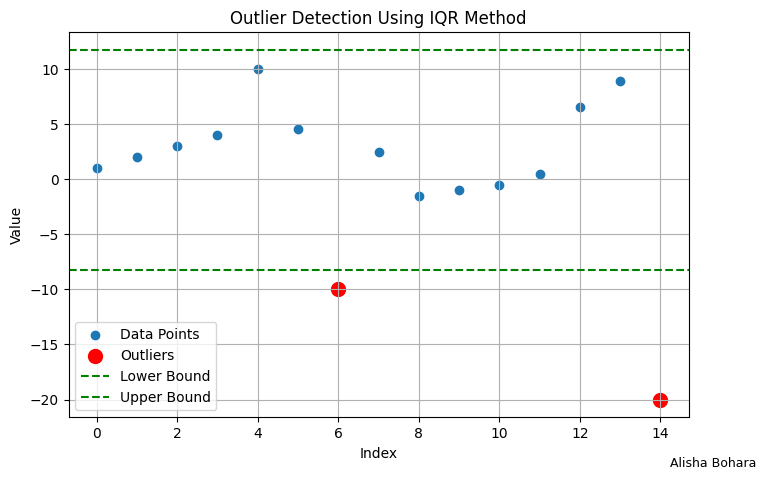

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading dataset
data = pd.read_csv('/content/drive/MyDrive/DWDM/data3.csv')  # adjust path if needed
X = data['Value'].values  # Extract 'Value' column as NumPy array

# Calculate Q1 (25th percentile) and Q3 (75th percentile)
Q1 = np.percentile(X, 25)
Q3 = np.percentile(X, 75)

# Calculate IQR
IQR = Q3 - Q1

# Define lower and upper bounds for outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Detect outliers
outliers = np.where((X < lower_bound) | (X > upper_bound))[0]


print(f"Q1 (25th percentile): {Q1:.3f}")
print(f"Q3 (75th percentile): {Q3:.3f}")
print(f"IQR (Q3 - Q1): {IQR:.3f}")
print(f"Lower Bound: {lower_bound:.3f}")
print(f"Upper Bound: {upper_bound:.3f}")

if len(outliers) == 0:
    print("\nNo outliers detected based on the IQR method.")
else:
    print(f"\nOutliers detected at indices: {list(outliers)}")
    print("Outlier values:", X[outliers])

# Plot data points and highlight outliers
plt.figure(figsize=(8, 5))
plt.scatter(range(len(X)), X, label='Data Points')
if len(outliers) > 0:
    plt.scatter(outliers, X[outliers], color='red', label='Outliers', s=100)
plt.axhline(lower_bound, color='green', linestyle='--', label='Lower Bound')
plt.axhline(upper_bound, color='green', linestyle='--', label='Upper Bound')
plt.title('Outlier Detection Using IQR Method')
plt.xlabel('Index')
plt.ylabel('Value')
plt.legend()
plt.grid(True)
plt.figtext(0.99, 0.01, " Alisha Bohara ", ha="right", fontsize=9, color='Black')
plt.show()


#9.Write a program to implement a mini-batch k-means algorithm.


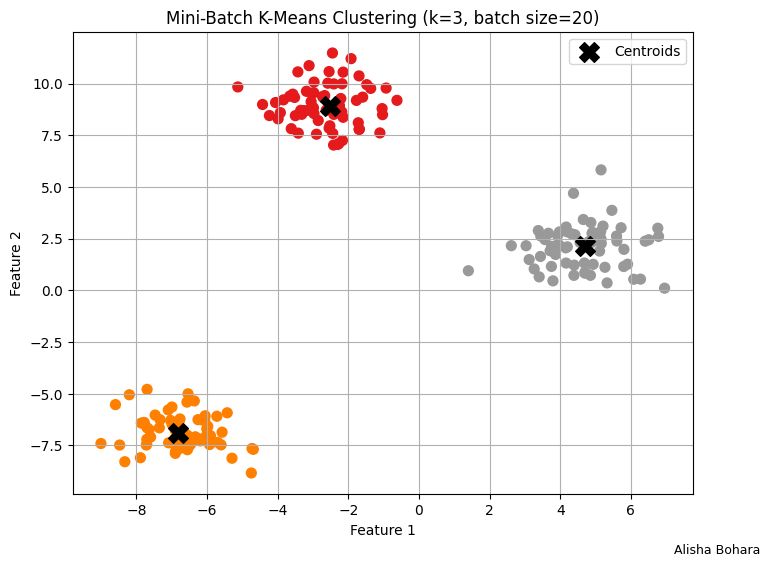

Cluster centers (k=3):
[[-2.5184752   8.91775287]
 [-6.81226827 -6.91499726]
 [ 4.70529014  2.13410961]]


In [30]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.cluster import MiniBatchKMeans

# Load dataset
data = pd.read_csv('/content/drive/MyDrive/DWDM/data4.csv')
X = data[['Feature_1', 'Feature_2']].values

# Set number of clusters and batch size
k = 3
batch_size = 20

# Initialize and fit MiniBatchKMeans
mbk = MiniBatchKMeans(n_clusters=k, batch_size=batch_size, random_state=42)
labels = mbk.fit_predict(X)

# Plot results
plt.figure(figsize=(8, 6))
plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='Set1', s=50)
plt.scatter(mbk.cluster_centers_[:, 0], mbk.cluster_centers_[:, 1],
            s=200, c='black', marker='X', label='Centroids')
plt.title(f'Mini-Batch K-Means Clustering (k={k}, batch size={batch_size})')
plt.xlabel('Feature 1')
plt.ylabel('Feature 2')
plt.legend()
plt.grid(True)
plt.figtext(0.99, 0.01, " Alisha Bohara ", ha="right", fontsize=9, color='Black')
plt.show()

# Print cluster centers
print(f"Cluster centers (k={k}):")
print(mbk.cluster_centers_)
